In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io.arff import loadarff 

#Funções de avaliação dos modelos
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict

#utils
from utils.num import Num
from utils.run_models import RunModels

In [5]:
#Classes do modelo de aprendizado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn import svm

In [6]:
raw_data = loadarff('mnist_784.arff')
df = pd.DataFrame(raw_data[0])

<BarContainer object of 10 artists>

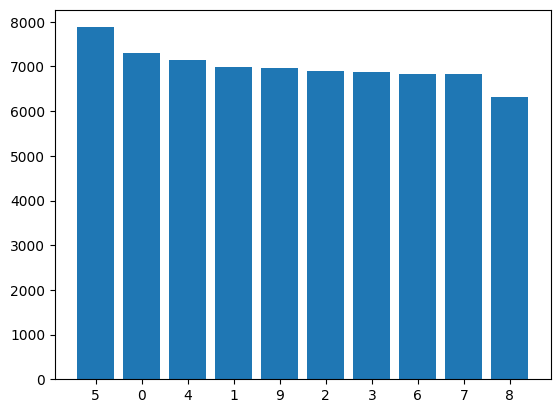

In [7]:
plt.bar(x = df['class'].unique(), height = df['class'].value_counts())

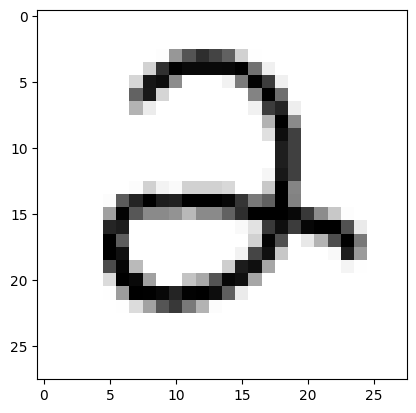

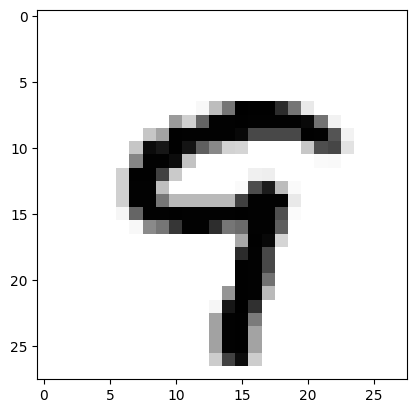

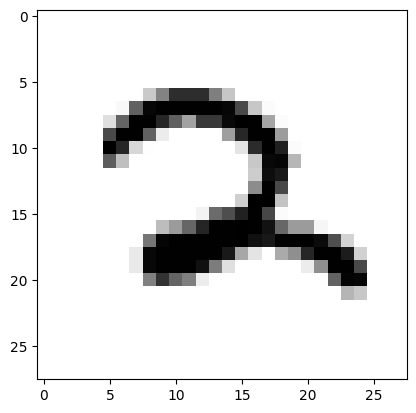

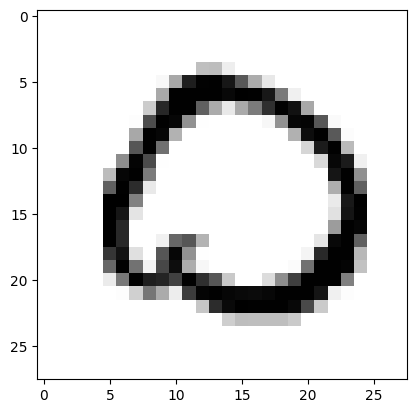

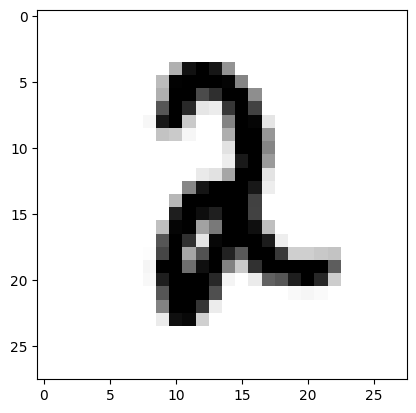

In [8]:
# Visualizando algumas instância do dataset

nums = df['class'].unique()

for i in np.random.randint(1000, size=5):
    p = np.reshape(np.array(df[df['class'] == np.random.choice(nums)].iloc[i][:-1]), (28,28)).astype('int')
    plt.imshow(p, cmap='gray_r', vmin=0, vmax=255)
    plt.show()

In [9]:
# Separando dataset

X = df.iloc[:, 0:-1]
y = df.iloc[:, [-1]].astype('int')


In [10]:
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    # 'GaussianNB': GaussianNB(),
    'MultinomialNB': MultinomialNB(),
    # 'Perceptron': Perceptron(),
    # 'MLP': MLPClassifier(),
    # 'SVM': svm.SVC(),
}

run = RunModels(models)

run.load_data(X,y)

In [11]:
# Treinando os modelos
run.train()

/home/balieiro/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/balieiro/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
run.report()

KNN

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1784
           1       0.96      1.00      0.98      2011
           2       0.99      0.96      0.97      1778
           3       0.98      0.97      0.97      1824
           4       0.98      0.96      0.97      1683
           5       0.97      0.98      0.97      1529
           6       0.98      0.99      0.98      1639
           7       0.96      0.98      0.97      1829
           8       0.99      0.94      0.97      1687
           9       0.96      0.96      0.96      1736

    accuracy                           0.97     17500
   macro avg       0.97      0.97      0.97     17500
weighted avg       0.97      0.97      0.97     17500

Decision Tree

              precision    recall  f1-score   support

           0       0.92      0.91      0.92      1784
           1       0.95      0.96      0.95      2011
           2       0.87      0.85      0.86      1778
    

KNN



/home/balieiro/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


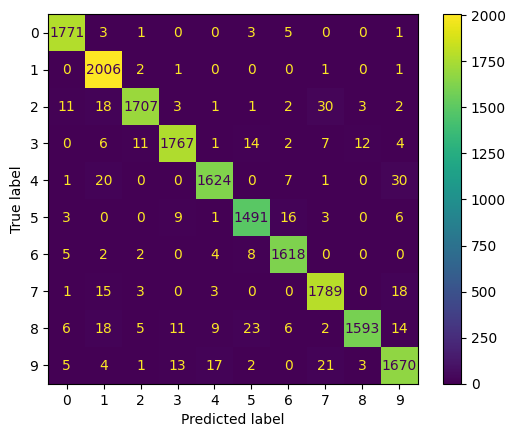

In [15]:
run.conf_matrix(['KNN'])

## Brincando com nossos números

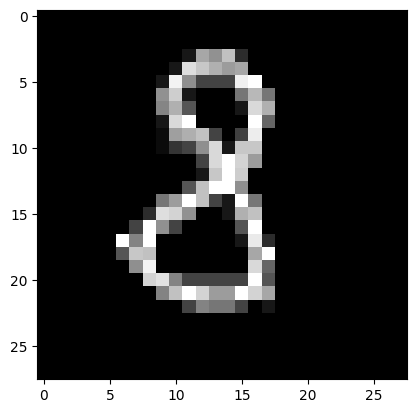

/home/balieiro/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([3])

In [16]:
# Testando número
num = Num('imgs/oito.png', invert=True)
num.plot()
run.models['KNN'].predict(num.to_array())

